<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/Soluci%C3%B3_anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

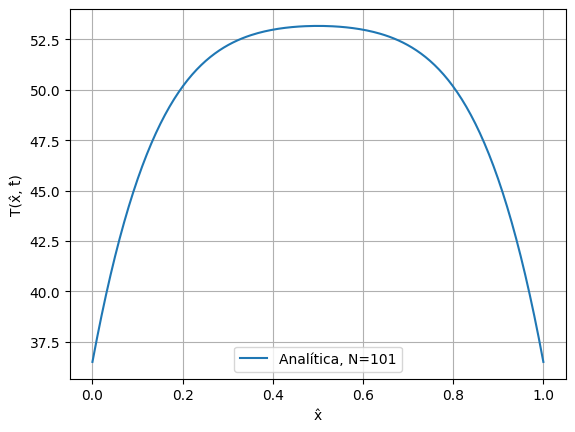

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Les nostres dades són:
C_v= 3686
rho= 1081
kappa= 0.56
sigma= 0.472
volts= 40
# Amb aquests, calculem la difusivitat, que farem servir per a la normalització
alpha= kappa/(C_v*rho)
# Imposem la nostra normalització
x_0= 0.02 # Triat per tal de normalitzar x_f, que ha de ser 0.02 m (2 cm)
x_f= 0.02/x_0
t_0= x_0**2/alpha # \tilde{t}=t/t_0
P_ext= volts**2*sigma/(2*(x_0)**2) # Calculada per anàlisi dimensional a partir de dades proporcionades, el facT_0r 2 dividint és perquè s'ha d'agafar el voltatge efectiu
T_0= P_ext/(C_v*rho)*t_0 # Unitats=Kelvin
# print(T_0)

t_f= 0.025 # Ja està normalitzat, ho diu l'enunciat
Tc = (36.5+273.15)/T_0
N = 101 # La que utilitzarem pels mètodes

def T_analytic_adim(x_hat, t_f, Tc, N=50):
    x_in = x_hat
    x_hat = np.asarray(x_hat, dtype=float)

    n = np.arange(1, N + 1)
    k = 2*n - 1  # 1,3,5,...

    coeff = 4.0 / (k**3 * np.pi**3) * (1.0 - np.exp(-k**2 * np.pi**2 * t_f))
    sin_term = np.sin(np.outer(k, np.pi * x_hat))

    T = Tc + np.sum(coeff[:, None] * sin_term, axis=0)

    if np.isscalar(x_in):
        return float(T[0])
    return T

x_vals = np.linspace(0.0, 1.0, 200)   # x adimensional
T_vals = T_analytic_adim(x_vals, t_f, Tc=Tc, N=N)

# Dimensionalitzem l'equació a graus centígrads
T_grausC = T_vals * T_0 - 273.15

# Fem la gràfica
plt.plot(x_vals, T_grausC, label=f"Analítica, N={N}")
plt.xlabel("x̂")
plt.ylabel("T(x̂, t̂)")
plt.grid(True)
plt.legend()
plt.show()
